# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Durante este proyecto voy a analizar los datos de el operador de telecomunicaciones Megaline, con la intencion de mejorar la oferta y los ingesos de la empresa. Para esto primero haré un análisis general de los datos, checando qué datos se proporcionan, si hay algun duplicado o dato auscente y que tipode dato es cada uno.

Una vez que haya limpiado y filtrado la informacion puedo empezar a comparar los datos de ambos planes revisando si hay alguna sub divicion que pueda hacer que sea util, como edad de las personas, origen, ingesos u otros datos que pueden ser importantes, probablemente para esto también sea necesario unir la informacion de algunas tablas.

Después de esto haré las graficas necesarias para facilitar la visualizacion y análisis de la información.

Por último revisar que no haya alguna otra informacion reelevante ha analizar que haya pasado por alto y dar los resultados de las hiótesis, dando sugerencias de como mejorar, que plan se usa mas e incluso si sería adecuado modificar o hacer un nuevo plan

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math as mt
from math import factorial
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La información es correcta, igual que los tipos de datos. No requiere ningún cambio

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


En este caso algunos de los tipos de datos están mal, así que hay que cambiarlos. También podríamos a gregar una columna que nos diga cuanto tiempo un usuario mantuvo un plan activo

### Corregir los datos

In [7]:
users['user_id'] = users['user_id'].astype(object)
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [8]:
users['activ_days'] = (users['churn_date'] - users['reg_date']).dt.days
users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,activ_days
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21.0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,NaN


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En este caso algunos de los tipos de datos están mal, así que hay que cambiarlos.

### Corregir los datos

In [11]:
calls['user_id'] = calls['user_id'].astype(object)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En este caso algunos de los tipos de datos están mal, así que hay que cambiarlos.

### Corregir los datos

In [14]:
messages['user_id'] = messages['user_id'].astype(object)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


En este caso algunos de los tipos de datos están mal, así que hay que cambiarlos.

### Corregir los datos

In [17]:
internet['user_id'] = internet['user_id'].astype(object)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


## Estudiar las condiciones de las tarifas

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls['call_month'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [20]:
calls_id_month = calls.groupby(['user_id', 'call_month'])['id'].count().rename('number_calls').reset_index()
calls_id_month

,user_id,call_month,number_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_id_duration = calls.groupby(['user_id', 'call_month'])['duration'].sum().rename('calls_duration').reset_index()
calls_id_duration

,user_id,call_month,calls_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages['message_month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [23]:
messages_id = messages.groupby(['user_id', 'message_month'])['id'].count().rename('number_messages').reset_index()
messages_id

,user_id,message_month,number_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [25]:
internet_mg = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().rename('mb_used_month').reset_index()
internet_mg

,user_id,session_month,mb_used_month
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Cambiar el nombre de las columnas referentes al mes
calls_id_month = calls_id_month.rename(columns={'call_month': 'month'})
calls_id_duration = calls_id_duration.rename(columns={'call_month': 'month'})
messages_id = messages_id.rename(columns={'message_month': 'month'})
internet_mg = internet_mg.rename(columns={'session_month': 'month'})

In [27]:
#unir los DF
usage_user = pd.merge(calls_id_month, calls_id_duration, on=['user_id', 'month'], how='outer')
usage_user = pd.merge(usage_user, messages_id, on=['user_id', 'month'], how='outer')
usage_user = pd.merge(usage_user, internet_mg, on=['user_id', 'month'], how='outer')
#Ordenar los valores
usage_user = usage_user.sort_values(['user_id', 'month']).reset_index(drop=True)
#Cambiar los NaN por 0
usage_user = usage_user.fillna(0)
#Cambiar el tipo de dato
usage_user['number_calls'] = usage_user['number_calls'].astype(int)
usage_user['number_messages'] = usage_user['number_messages'].astype(int)
usage_user

,user_id,month,number_calls,calls_duration,number_messages,mb_used_month
0,1000,12,16,116.83,11,1901.47
1,1001,8,27,171.14,30,6919.15
2,1001,9,49,297.69,44,13314.82
3,1001,10,65,374.11,53,22330.49
4,1001,11,64,404.59,36,18504.30
...,...,...,...,...,...,...
2288,1498,12,39,324.77,0,23137.69
2289,1499,9,41,330.37,0,12984.76
2290,1499,10,53,363.28,0,19492.43
2291,1499,11,45,288.56,0,16813.83


In [28]:
# Añade la información de la tarifa
#Agregar la tarifa que tiene cada usuario
usage_user = pd.merge(usage_user, users, on='user_id', how='left')
usage_user.head()

,user_id,month,number_calls,calls_duration,number_messages,mb_used_month,first_name,last_name,age,city,reg_date,plan,churn_date,activ_days
0,1000,12,16,116.83,11,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,8,27,171.14,30,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1001,9,49,297.69,44,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
3,1001,10,65,374.11,53,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
4,1001,11,64,404.59,36,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN


In [29]:
usage_user = usage_user[['user_id','month','number_calls','calls_duration','number_messages','mb_used_month','plan','city']]
usage_user.head()

,user_id,month,number_calls,calls_duration,number_messages,mb_used_month,plan,city
0,1000,12,16,116.83,11,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,171.14,30,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,297.69,44,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,374.11,53,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,404.59,36,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [30]:
# Calcula el ingreso mensual para cada usuario

#función
def calcular_ingreso(row):

#Datos de planes
    # surf
    messages_included_surf = 50
    mb_per_month_included_surf = 15360
    minutes_included_surf = 500
    usd_monthly_pay_surf = 20
    usd_per_gb_surf = 10
    usd_per_message_surf = 0.03
    usd_per_minute_surf = 0.03
    
    #ultimate
    messages_included_ultimate = 1000
    mb_per_month_included_ultimate = 30720
    minutes_included_ultimate = 3000
    usd_monthly_pay_ultimate = 70
    usd_per_gb_ultimate = 7
    usd_per_message_ultimate = 0.01
    usd_per_minute_ultimate = 0.01

    #funcion surf
    # Usé if pensando que en un futuro se podría agregar un nuevo plan
    if row['plan'] == 'surf':
        extra_minutes = max(row['calls_duration'] - minutes_included_surf, 0)
        extra_messages = max(row['number_messages'] -  messages_included_surf, 0)
        extra_mb = max(row['mb_used_month'] - mb_per_month_included_surf, 0)
        return usd_monthly_pay_surf + (extra_minutes * usd_per_minute_surf) + (extra_messages * usd_per_message_surf) + ((extra_mb/ 1024) * usd_per_gb_surf)

    #funcion ultimate
    if row['plan'] == 'ultimate':
        extra_minutes = max(row['calls_duration'] - minutes_included_ultimate, 0)
        extra_messages = max(row['number_messages'] -  messages_included_ultimate, 0)
        extra_mb = max(row['mb_used_month'] - mb_per_month_included_ultimate, 0)
        return usd_monthly_pay_ultimate + (extra_minutes * usd_per_minute_ultimate) + (extra_messages * usd_per_message_ultimate) + ((extra_mb/ 1024) * usd_per_gb_ultimate)

    

usage_user['ingresos'] = usage_user.apply(calcular_ingreso, axis=1)
usage_user['ingresos'] = usage_user['ingresos'].round(2)
usage_user

,user_id,month,number_calls,calls_duration,number_messages,mb_used_month,plan,city,ingresos
0,1000,12,16,116.83,11,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,8,27,171.14,30,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,9,49,297.69,44,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,10,65,374.11,53,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",88.16
4,1001,11,64,404.59,36,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50.71
...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,324.77,0,23137.69,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",95.95
2289,1499,9,41,330.37,0,12984.76,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.00
2290,1499,10,53,363.28,0,19492.43,surf,"Orlando-Kissimmee-Sanford, FL MSA",60.36
2291,1499,11,45,288.56,0,16813.83,surf,"Orlando-Kissimmee-Sanford, FL MSA",34.20


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mean_duration = usage_user.pivot_table(index='month', columns='plan', values='calls_duration', aggfunc='mean').round(2)
mean_duration

plan,surf,ultimate
month,,
1,192.84,183.16
2,280.85,379.86
3,310.97,285.70
4,332.38,316.51
5,377.05,383.66
6,407.21,349.81
7,424.52,403.77
8,387.17,397.27
9,390.99,413.29


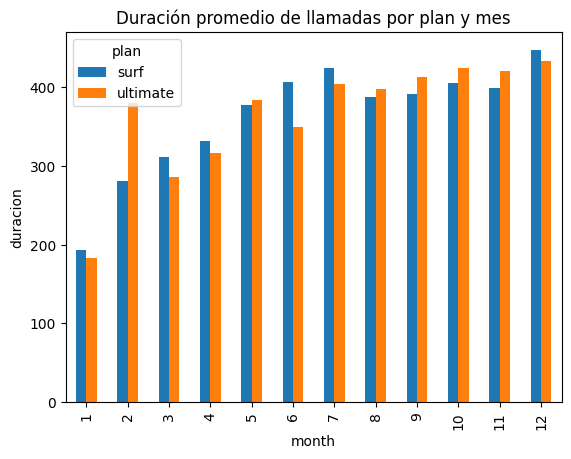

In [32]:
mean_duration.plot(kind='bar', title='Duración promedio de llamadas por plan y mes', xlabel='month', ylabel='duracion')
plt.show()

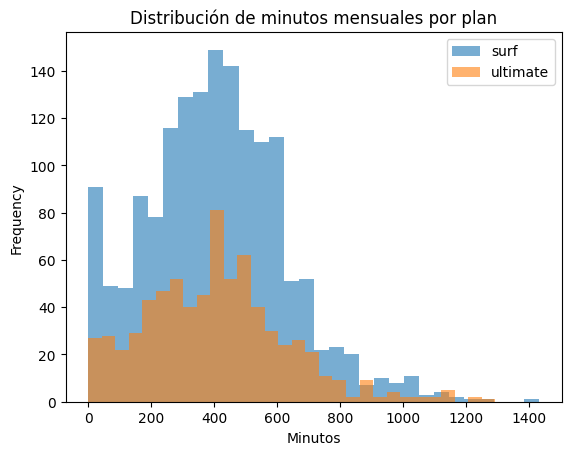

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
usage_user[usage_user['plan'] == 'surf']['calls_duration'].plot(kind='hist', bins=30, alpha=0.6, label='surf')
usage_user[usage_user['plan'] == 'ultimate']['calls_duration'].plot(kind='hist', bins=30, alpha=0.6, label='ultimate')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
varianza_surf = np.var(usage_user[usage_user['plan'] == 'surf']['calls_duration'])
media_surf = usage_user[usage_user['plan']=='surf']['calls_duration'].mean()
print('Media:', media_surf)
print('Varianza:', varianza_surf)

Media: 404.76239033693577
Varianza: 49103.8683332564


In [35]:
varianza_ultimate = np.var(usage_user[usage_user['plan'] == 'ultimate']['calls_duration'])
varianza_ultimate
media_ultimate = usage_user[usage_user['plan']=='ultimate']['calls_duration'].mean()
print('Media:', media_ultimate)
print('Varianza:', varianza_ultimate)

Media: 406.1930833333333
Varianza: 51569.24783077083


(0.0, 1400.0)

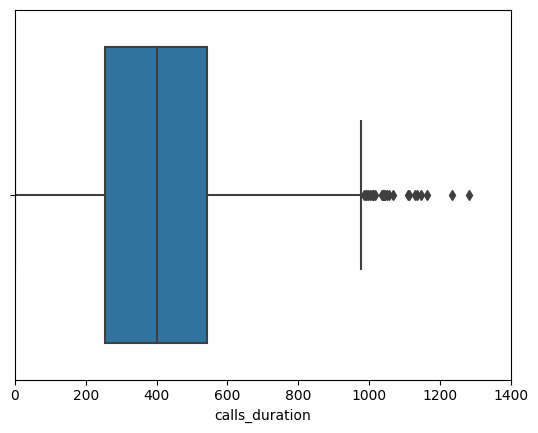

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(usage_user[usage_user['plan'] == 'surf']['calls_duration'])
plt.xlim([0,1400])

(0.0, 1400.0)

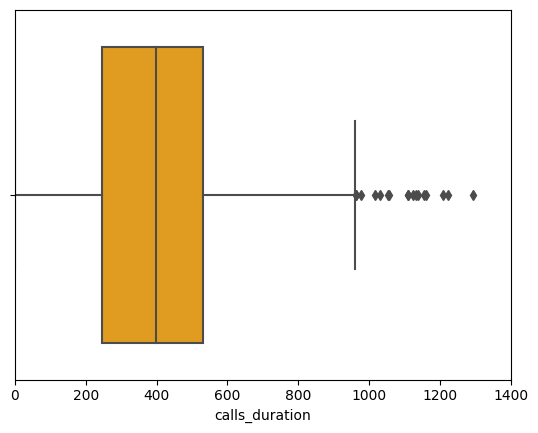

In [37]:
sns.boxplot(usage_user[usage_user['plan'] == 'ultimate']['calls_duration'], color= 'orange')
plt.xlim([0,1400])

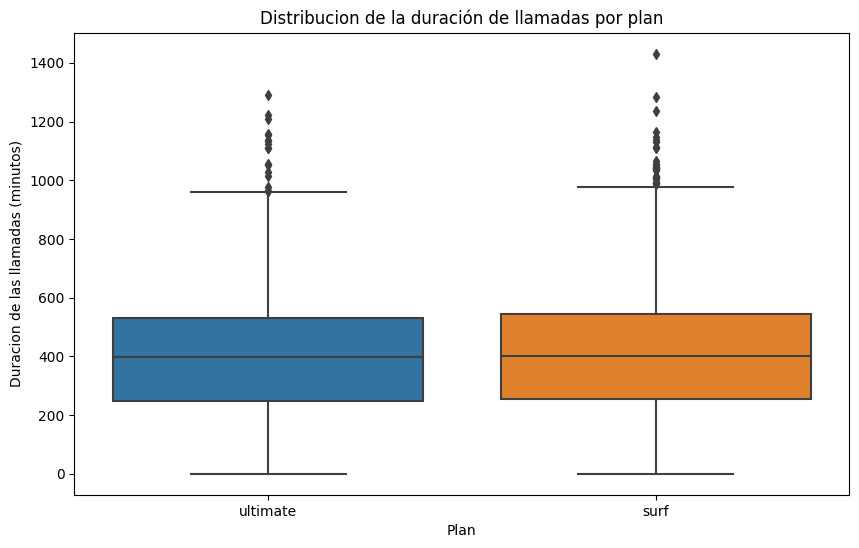

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Crear el boxplot para la duracion de las llamadas por cada plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=usage_user, x='plan', y='calls_duration')

plt.title('Distribucion de la duración de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duracion de las llamadas (minutos)')
plt.show()

Podemos verque la diferencia en la duracion de las llamadas no varía mucho entre cada uno de los planes, ademas de  que la duracion de las llamadas en la mayoria de los casos tanto en el plan surf como en el ultimate no superan los 500 minutos que es lo que incluye el paquete con menos minutos.

### Mensajes

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_messages = usage_user.pivot_table(index='month', columns='plan', values='number_messages', aggfunc='mean').round(2)
mean_messages

plan,surf,ultimate
month,,
1,10.50,15.50
2,12.00,21.57
3,15.26,20.25
4,17.40,22.05
5,24.01,32.10
6,25.30,29.34
7,27.03,32.83
8,28.78,38.48
9,30.76,37.90


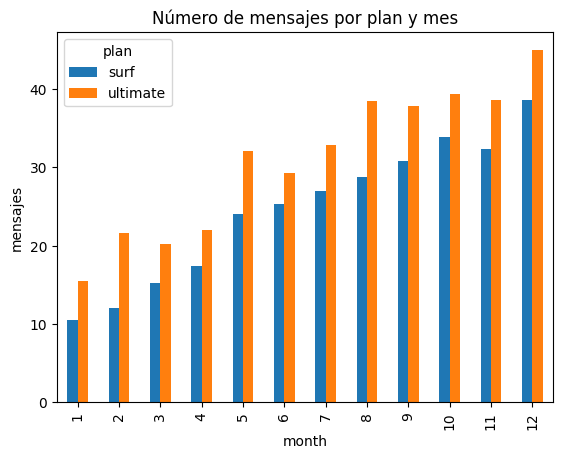

In [40]:
mean_messages.plot(kind='bar', title='Número de mensajes por plan y mes', xlabel='month', ylabel='mensajes')
plt.show()

En este caso podemos ver una mayor diferencia entre cada uno de los planes sin embargo en promedio la gente sigue sin superar los mensajes incluidos en el plan más básico

### Internet

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mean_internet = usage_user.pivot_table(index='month', columns='plan', values='mb_used_month', aggfunc='mean').round(2)
mean_internet

plan,surf,ultimate
month,,
1,4874.86,6918.09
2,12178.84,17128.81
3,13345.44,18321.52
4,11984.20,16121.65
5,13936.35,16624.48
6,15301.53,15337.92
7,16783.60,16344.74
8,16795.33,17814.72
9,16591.43,16969.87


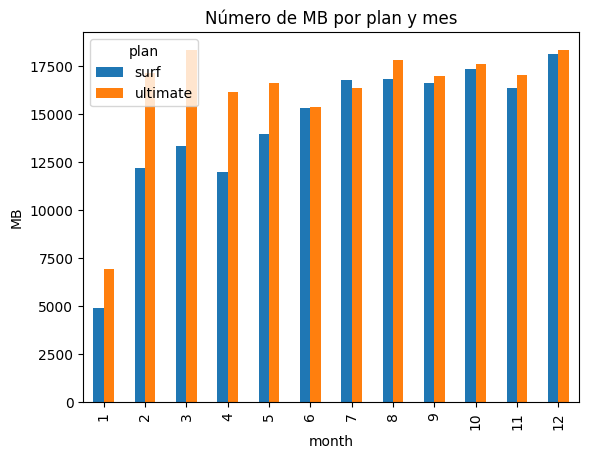

In [42]:
mean_internet.plot(kind='bar', title='Número de MB por plan y mes', xlabel='month', ylabel='MB')
plt.show()

En el caso de el internet ya podemos ver que el promedio de la gente si llega a superar el numero de mb incluidos en el paquete mas basico. Así que muy probablemente esta es la razon por las que los usuarios se deciden entre un plan y otro. aun que incluso los usuarios que se deciden por el paquete más básico terminan por superar el limite de MB incluidos

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [43]:
mean_ingresos = usage_user.pivot_table(index='month', columns='plan', values='ingresos', aggfunc='mean').round(2)
mean_ingresos

plan,surf,ultimate
month,,
1,20.00,70.00
2,33.00,70.00
3,43.58,73.39
4,38.78,72.77
5,45.35,70.52
6,45.92,71.48
7,59.17,71.85
8,60.65,72.68
9,54.92,71.81


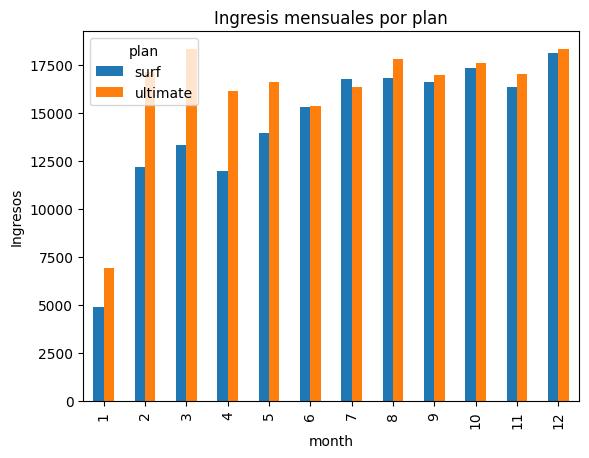

In [44]:
mean_internet.plot(kind='bar', title='Ingresis mensuales por plan', xlabel='month', ylabel='Ingresos')
plt.show()

A pesar de que los usuarios del plan surf en promedio pagan un poco extra por el uso extra de internet el plan ultimate sigue generando mas ingresos por lo que probablemente sería mejor hacer más publicidad del plan ultimate

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [45]:
# Prueba las hipótesis
alpha = 0.05

hipotesis_ingresos = st.ttest_ind(usage_user[usage_user['plan'] == 'ultimate']['ingresos'],
                                  usage_user[usage_user['plan'] == 'surf']['ingresos'], 
                                  equal_var=False)
print('valor p:', hipotesis_ingresos.pvalue)

if (hipotesis_ingresos.pvalue < alpha):
    print("Rechazamos la hipótesis nula: Existe diferencia significativa")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa")

valor p: 4.88170764473932e-25
Rechazamos la hipótesis nula: Existe diferencia significativa


In [46]:
usage_user_ny_nj = usage_user['city'].unique()
usage_user_ny_nj

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [47]:
# Prueba las hipótesis
alpha = 0.05

hipotesis_ingresos = st.ttest_ind(usage_user[usage_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos'],
                                  usage_user[usage_user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos'], 
                                  equal_var=False)
print('valor p:', hipotesis_ingresos.pvalue)

if (hipotesis_ingresos.pvalue < alpha):
    print("Rechazamos la hipótesis nula: Existe diferencia significativa")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa")


valor p: 0.018609833641990585
Rechazamos la hipótesis nula: Existe diferencia significativa


## Conclusión general

El plan Ultimate genera más ingresos mensuales que Surf

Aunque los ingresos del plan Surf se acercan a los de Ultimate gracias a los cargos adicionales por exceso de consumo, Ultimate sigue siendo más rentable en términos absolutos debido a su precio fijo más alto ($70 vs. $20).

Los usuarios de Ultimate rara vez superan los límites incluidos, lo que significa que sus ingresos son más estables y predecibles.

El plan Surf depende de excesos para ser competitivo

Los usuarios de Surf generan ingresos adicionales cuando superan los límites de minutos, mensajes o datos, pero esto no siempre compensa la diferencia de precio base.

Si los usuarios de Surf no exceden los límites, los ingresos son significativamente menores que los de Ultimate.

Distribución de clientes y retención

Ultimate atrae a usuarios con alto consumo, lo que garantiza ingresos constantes.

Surf es más accesible, pero su rentabilidad depende de que los usuarios consuman más de lo incluido.

Recomendaciones para Maximizar Rentabilidad
✅ Enfatizar la venta del plan Ultimate a usuarios con alto consumo de datos, llamadas o mensajes, ya que garantiza mayores ingresos fijos.

✅ Ajustar los límites del plan Surf para incentivar más excesos (sin afectar la satisfacción del cliente) o introducir un plan intermedio con un precio ligeramente mayor pero mejores beneficios.

✅ Analizar la fuga de clientes:

¿Algunos usuarios de Ultimate cambian a Surf para ahorrar?

¿Los usuarios de Surf que generan muchos excesos podrían ser persuadidos de pasarse a Ultimate?

✅ Campañas de marketing diferenciadas:

Para Ultimate: Destacar su valor en comodidad y ahorro (sin preocuparse por excesos).

Para Surf: Posicionarlo como una opción económica pero con flexibilidad (ideal para usuarios con consumo moderado).

Conclusión Final
El plan Ultimate es más rentable en términos generales, pero el plan Surf puede ser estratégico para captar usuarios con menor presupuesto que, al exceder los límites, contribuyen a ingresos adicionales.

Megaline debería:
🔹 Promover Ultimate entre los usuarios de alto consumo para maximizar ingresos fijos.
🔹 Optimizar Surf para aumentar los excesos sin perder clientes.
🔹 Explorar un plan intermedio que capture a usuarios en el límite entre ambos planes.

Este equilibrio permitirá a Megaline maximizar sus ingresos totales mientras mantiene una base de clientes satisfechos en ambos segmentos. 